In [21]:
import pandas as pd 
import numpy as np 

from sklearn.datasets import load_iris

from mlxtend.feature_selection \
    import ExhaustiveFeatureSelector as EFS 

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [22]:
iris = load_iris()
x = pd.DataFrame(iris.data, \
    columns=iris.feature_names)

In [23]:
lr = LogisticRegression()

In [24]:
efs = EFS(estimator=lr,        
          min_features=1,      
          max_features=3,      
          scoring='accuracy',  
          cv=5)

In [25]:
efd = efs.fit(x,iris.target)

Features: 14/14

In [26]:
efs.best_feature_names_

('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')

In [27]:
efs_results = pd.DataFrame(efs.get_metric_dict()).\
    T.\
    sort_values(by='avg_score', ascending=False)

In [28]:
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
12,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w...",0.027096,0.021082,0.010541
13,"(1, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal width (cm), petal length (cm), petal wi...",0.027096,0.021082,0.010541
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)",0.049963,0.038873,0.019437
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))",0.032061,0.024944,0.012472
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length (cm),)",0.051412,0.04,0.02
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), petal length (cm))",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal length (cm), petal width (cm))",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal width (cm), petal length (cm))",0.051412,0.04,0.02
10,"(0, 1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), sepal width (cm), petal le...",0.051412,0.04,0.02
11,"(0, 1, 3)","[0.9, 0.9666666666666667, 0.9333333333333333, ...",0.946667,"(sepal length (cm), sepal width (cm), petal wi...",0.043691,0.033993,0.016997


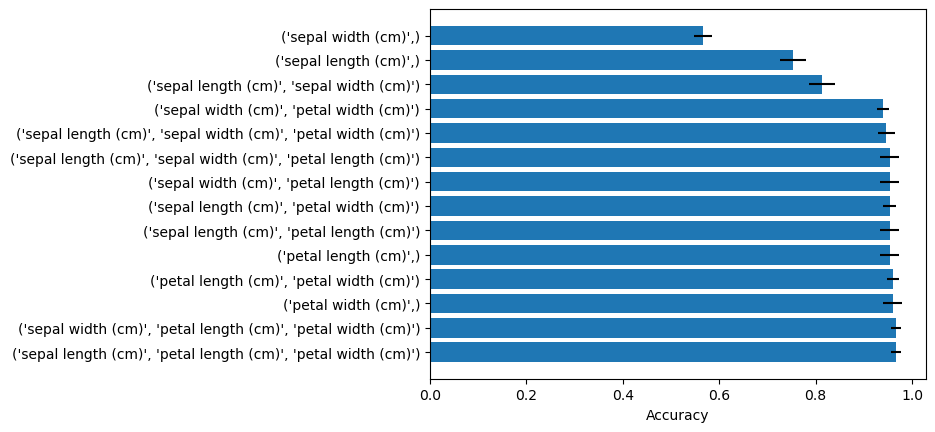

In [29]:
fig, ax = plt.subplots()

y_pos = np.arange(len(efs_results))
ax.barh(y_pos, efs_results['avg_score'],\
    xerr = efs_results['std_err'])

ax.set_yticks(y_pos)
ax.set_yticklabels(efs_results['feature_names'])
ax.set_xlabel('Accuracy')

plt.show()